# Create Insights

### Imports and constants

In [1]:
import random
import pandas as pd
import ast
import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter, OrderedDict
from transformers import AutoConfig, AutoTokenizer, AutoModel, pipeline
from summarizer import Summarizer

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
FILE_NAME = './results/cluster_results.csv'

CLUSTER_NUMBER = 1

In [4]:
PREV = "Efforts to develop prophylaxis clinical studies and prioritize in healthcare workers"

THERAPEUTIC_1 =  "Effectiveness of drugs being developed and tried to treat COVID-19 patients."
THERAPEUTIC_2 =  "Clinical and bench trials to investigate less common viral inhibitors against COVID-19 such as naproxen, clarithromycin, and minocyclinethat that may exert effects on viral replication."
THERAPEUTIC_3 = "Capabilities to discover a therapeutic for the disease, and clinical effectiveness studies to discover therapeutics, to include antiviral agents."

VACCINE_1 = "Methods evaluating potential complication of Antibody-Dependent Enhancement (ADE) in vaccine recipients."
VACCINE_2 =  "Exploration of use of best animal models and their predictive value for a human vaccine."
VACCINE_3 =  "Efforts targeted at a universal coronavirus vaccine."
VACCINE_4 =  "Approaches to evaluate risk for enhanced disease after vaccination"
VACCINE_5 =  "Assays to evaluate vaccine immune response and process development for vaccines, alongside suitable animal models [in conjunction with therapeutics]"

DISTRIBUTION = "Alternative models to aid decision makers in determining how to prioritize and distribute scarce, newly proven therapeutics as production ramps up. This could include identifying approaches for expanding production capacity to ensure equitable and timely distribution to populations in need."

QUESTIONS = [PREV, THERAPEUTIC_1, THERAPEUTIC_2, THERAPEUTIC_3, 
             VACCINE_1, VACCINE_2, VACCINE_3, VACCINE_4, VACCINE_5, DISTRIBUTION]

In [5]:
QUESTIONS[CLUSTER_NUMBER]

'Effectiveness of drugs being developed and tried to treat COVID-19 patients.'

### Import and read clustered data

In [6]:
df_nn = pd.read_csv(FILE_NAME)
df_nn = df_nn.drop(columns=['Unnamed: 0'])

df_nn['disease_on_abstract'] = [ast.literal_eval(a) for a in df_nn['disease_on_abstract']]
df_nn['chemicals_on_abstract'] = [ast.literal_eval(a) for a in df_nn['chemicals_on_abstract']]
df_nn['cluster_vote'] = [ast.literal_eval(a) for a in df_nn['cluster_vote']]

In [7]:
df_nn.head()

Unnamed: 0.1  cord_uid                                              title  \
0             0  xqhn0vbp  Airborne rhinovirus detection and effect of ul...   
1             1  gi6uaa83    Discovering human history from stomach bacteria   
2             2  fy4w7xz8  Association of HLA class I with severe acute r...   
3             3  0qaoam29   A double epidemic model for the SARS propagation   
4             4  qj4dh6rg  Cloaked similarity between HIV-1 and SARS-CoV ...   

  license                                           abstract publish_time  \
0   no-cc  BACKGROUND: Rhinovirus, the most common cause ...   2003-01-13   
1   no-cc  Recent analyses of human pathogens have reveal...   2003-04-28   
2   no-cc  BACKGROUND: The human leukocyte antigen (HLA) ...   2003-09-12   
3   no-cc  BACKGROUND: An epidemic of a Severe Acute Resp...   2003-09-10   
4   no-cc  BACKGROUND: Severe acute respiratory syndrome ...   2003-09-21   

                                             authors            journal  \
0  Myatt, Theodore A; Johnston, Sebastian L; Rudn...  BMC Public Health   
1                                   Disotell, Todd R        Genome Biol   
2  Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...      BMC Med Genet   
3  Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine     BMC Infect Dis   
4                    Kliger, Yossef; Levanon, Erez Y      BMC Microbiol   

                                                 url disease_on_abstract  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...               [AVL]   
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...                  []   
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...    [SARS infection]   
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...              [SARS]   
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...   [HIV1 to SARSCoV]   

  chemicals_on_abstract  coronavirus_article  \
0                    []                 True   
1                    []                 True   
2           [HLAB 4601]                 True   
3                    []                 True   
4   [leucineisoleucine]                 True   

                               roberta_title_vectors  kmean_cluster clusters  \
0  [-0.06820101290941238, 0.05520227923989296, 0....             11     [-1]   
1  [-0.10113315284252167, -0.04692019894719124, 0...              1     [-1]   
2  [-0.08171918988227844, -0.04451337829232216, -...              7     [-1]   
3  [-0.03993494436144829, -0.07934241741895676, -...             14     [-1]   
4  [-0.0773564875125885, -0.020539801567792892, -...             14     [-1]   

  cluster_vote     tsne_0     tsne_1  
0         [-1]  70.301994   9.024674  
1         [-1]  35.141170  19.811360  
2         [-1]  10.640420  23.070890  
3         [-1]  26.566854 -30.609558  
4         [-1]   7.294234   9.227928

In [8]:
indexes = []
for i in range(len(df_nn)):
    if CLUSTER_NUMBER in df_nn['cluster_vote'][i]:
        indexes.append(i)

In [9]:
df_cluster = df_nn.loc[indexes].reset_index(drop=True)

### Vizualization of groups and advising what to read

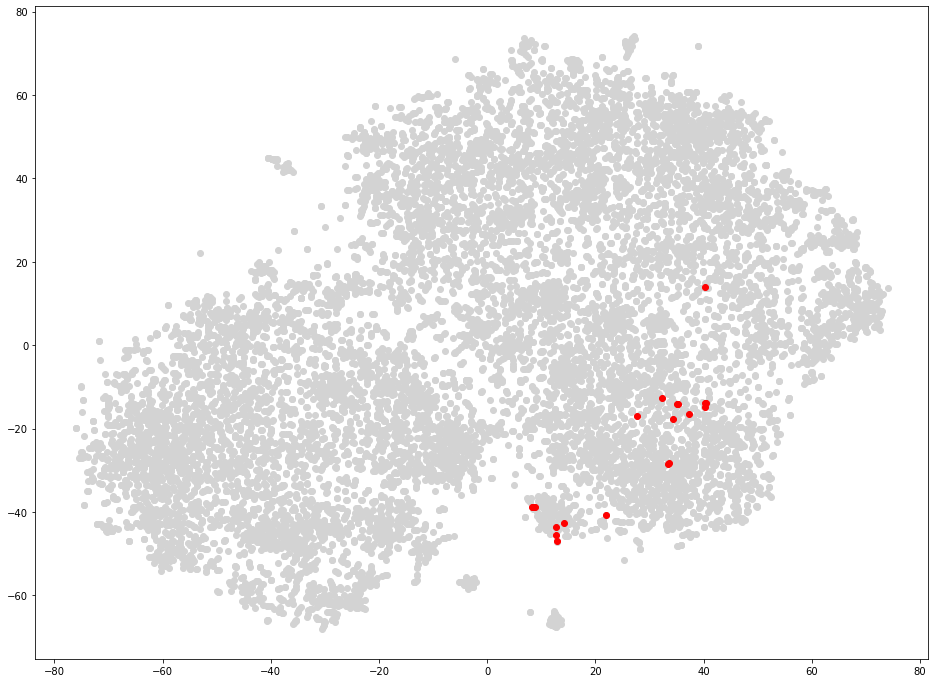

In [10]:
plt.figure(figsize=(16, 12))
plt.scatter(df_nn['tsne_0'], df_nn['tsne_1'], color='lightgrey')
plt.scatter(df_cluster['tsne_0'], df_cluster['tsne_1'], color='red')

In [11]:
df_cluster[df_cluster['license']!='question']

Unnamed: 0.1  cord_uid                                              title  \
0           5813  vxqdfiel  Clinical trials on drug repositioning for COVI...   
1           5814  0uengr9t  COVID-19 and treatment with NSAIDs and cortico...   
2           6131  svvfeaxs  Why tocilizumab could be an effective treatmen...   
3           6504  dxiyqf9d  Is home isolation appropriate for preventing t...   
4           6618  nv70mlae  Convalescent plasma: A possible treatment of C...   
5           6666  yf5g53a9  Teicoplanin: an alternative drug for the treat...   
6           6794  lgqseo8t  COVID-19 in Colombia endpoints. Are we differe...   
7           6815  j8n06hzx  Treatment options for COVID-19: the reality an...   
8           7100  hlhfx3fm  A simple laboratory parameter facilitates earl...   
9           7217  oeqf7uk9  Gender differences in patients with COVID-19: ...   
10          8215  ai9jh0xu  Reduction in time delay of isolation in COVID-...   
11          8376  8bmcd22v  The respiratory sound features of COVID-19 pat...   
12          8910  yfzod931  Using public health law to contain the spread ...   
13          9716  xgw6msls  Discussion on the design of special CT room fo...   
14          9734  brzprnz3  Preliminary study on exploring the trajectory ...   
15          9931  k0te068l  Implications of COVID-19 for patients with pre...   
16         10205  v9h4rlln  Sex difference and smoking predisposition in p...   
17         10805  19z4ej76  There is nothing permanent except change. The ...   
18         11998  w30flf42      Taking the right measures to control COVID-19   

      license                                           abstract publish_time  \
0       cc-by  The World Health Organization (WHO) was inform...   2020-03-20   
1       cc-by  Given the current SARS-CoV-2 (COVID-19) pandem...   2020-03-30   
2       cc-by  A severe pneumonia-associated respiratory synd...   2020-04-14   
3   els-covid  Abstract Objectives At the end of 2019, the CO...   2020-04-08   
4   els-covid  Abstract In India, SARS-CoV-2 virus–induced co...   2020-04-15   
5   els-covid  ABSTRACT In December 2019, a novel coronavirus...   2020-03-13   
6   els-covid  Abstract The infection by the new coronavirus ...   2020-03-31   
7   els-covid  Abstract An outbreak related to the severe acu...   2020-04-04   
8     medrvix  The total number of COVID-19 patients since th...   2020-02-17   
9     medrvix  Importance: The recent outbreak of Novel Coron...   2020-02-25   
10    medrvix  Korean public health authorities raised the pu...   2020-04-07   
11    medrvix  Background: The 2019 novel coronavirus (COVID-...   2020-04-10   
12        unk  Richard Griffith, Senior Lecturer in Health La...   2020-03-12   
13        unk  Objective New infectious diseases have become ...         2020   
14        unk  Objective To explore data mining methods and t...         2020   
15  els-covid  The outbreak of coronavirus disease 2019 (COVI...   2020-05-31   
16  els-covid  The outbreak of novel coronavirus disease 2019...   2020-04-30   
17  els-covid  Abstract The sudden appearance of apparently n...   1995-02-28   
18  els-covid  First, although COVID-19 is spread by the airb...   2020-03-05   

                                              authors  \
0         Rosa, Sandro G. Viveiros; Santos, Wilson C.   
1   Russell, Beth; Moss, Charlotte; Rigg, Anne; Va...   
2             Fu, Binqing; Xu, Xiaoling; Wei, Haiming   
3   Feng, Zhan-hui; Cheng, Yong-ran; Ye, Lan; Zhou...   
4                         Teixeira da Silva, Jaime A.   
5   Baron, Sophie Alexandra; Devaux, Christian; Co...   
6   Amariles, Pedro; Granados, Johan; Ceballos, Ma...   
7       Jean, Shio-Shin; Lee, Ping-Ing; Hsueh, Po-Ren   
8   Qilin Li; Xiuli Ding; Geqing Xia; Zhi Geng; Fe...   
9   Jian-Min Jin; Peng Bai; Wei He; Fei Wu; Xiao-F...   
10            Sukhyun Ryu; Cheolsun Jang; Baekjin Kim   
11  Ying hui Huang; Si jun Meng; Yi Zhang; Shui sh...   
12                   

### Number of Articles through time

In [12]:
df_cluster_articles = df_cluster[df_cluster['license']!='question']

In [13]:
for i in range(len(df_cluster_articles)):
    try:
        df_cluster_articles['publish_time'][i] = datetime.datetime.strptime(df_cluster_articles['publish_time'][i],
                                                                            "%Y-%m-%d").date().year
    except:
        df_cluster_articles['publish_time'][i] = datetime.datetime.strptime(df_cluster_articles['publish_time'][i],
                                                                            "%Y").date().year

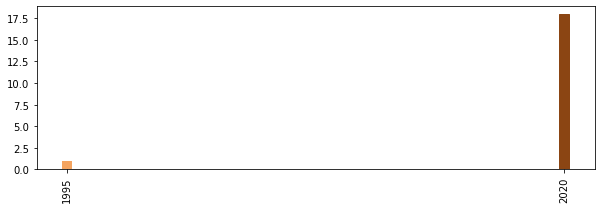

In [14]:
x = Counter(df_cluster_articles['publish_time'].values)
labels, values = zip(*OrderedDict(x.most_common()).items())

plt.figure(figsize=(10, 3)) 
ax = plt.subplot(111)
barlist = ax.bar(labels, values, width=0.5, align='center', tick_label=labels, color='sandybrown')
if 2020 in labels:
    barlist[0].set_color('saddlebrown')
plt.xticks(rotation='vertical')


plt.show()

### Keywords Extraction

https://towardsdatascience.com/textrank-for-keyword-extraction-by-python-c0bae21bcec0

In [15]:
ARTICLE = '. '.join(df_cluster[df_cluster['license']!='question']['abstract'][1:25].values)

from gensim.summarization import keywords

c = keywords(ARTICLE, words=20, lemmatize=True, pos_filter=('NP', 'NN'), scores=True, split=True)

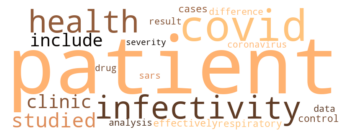

In [16]:
wordcloud = WordCloud(prefer_horizontal=1.0,
                      width=800,
                      height=300,
                      max_font_size=200,
                      max_words=25,
                      colormap="copper",
                      background_color='white').generate_from_frequencies(dict(c))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.close()

### NER

In [20]:
chemical_flat_list = [item.lower() for sublist in df_cluster['chemicals_on_abstract'] for item in sublist]

c = Counter(chemical_flat_list)
c.most_common(10)

[('tcm', 1),
 ('corticosteroids', 1),
 ('tocilizumab', 1),
 ('selfsolate', 1),
 ('cp', 1),
 ('teicoplanin', 1),
 ('angiotensin ii', 1),
 ('cackles', 1),
 ('li', 1),
 ('smoking', 1)]

In [21]:
disease_flat_list = [item.lower() for sublist in df_cluster['disease_on_abstract'] for item in sublist]

c = Counter(disease_flat_list)
c.most_common(10)

[('covid19', 7),
 ('infection', 2),
 ('respiratory syndrome', 2),
 ('sarscov2 infection', 2),
 ('sarscov2', 2),
 ('viral respiratory infections', 1),
 ('lymphopenia', 1),
 ('sars', 1),
 ('coronavirus disease', 1),
 ('coronavirus and the disease', 1)]

## Text Summarization

### Extractive

https://huggingface.co/emilyalsentzer/Bio_Discharge_Summary_BERT
    
https://pypi.org/project/bert-extractive-summarizer/

In [22]:
# Load model, model config and tokenizer via Transformers
custom_config = AutoConfig.from_pretrained('emilyalsentzer/Bio_Discharge_Summary_BERT')
custom_config.output_hidden_states=True
custom_tokenizer = AutoTokenizer.from_pretrained('emilyalsentzer/Bio_Discharge_Summary_BERT')
custom_model = AutoModel.from_pretrained('emilyalsentzer/Bio_Discharge_Summary_BERT', 
                                         config=custom_config)

In [23]:
model = Summarizer(custom_model=custom_model, custom_tokenizer=custom_tokenizer)

In [24]:
model(ARTICLE, min_length=60, max_length=150)

'Given the current SARS-CoV-2 (COVID-19) pandemic, the availability of reliable information for clinicians and patients is paramount. A large-scale study investigating the clinical efficacy of remdesivir (200 mg on day 1, followed by 100 mg once daily) is on-going. The patients in two cohorts all had similar symptoms, mainly fever and respiratory symptoms. In the public data set, age was also comparable between men and women in the deceased group or the survived group in patients with COVID-19. Each physician individually described the abnormal breathing sounds that he heard. Cackles, asymmetrical vocal resonance and indistinguishable murmurs are the most common abnormal breath sounds. The key control activities include family visiting, traveling and shopping. Nonetheless, the current literature does not support smoking as a predisposing factor in men or any subgroup for infection with SARS-CoV-2. Whether a true change in host range occurs, or whether the virus adapted to the host and 

### Abstractive

https://huggingface.co/transformers/usage.html#summarization

https://arxiv.org/pdf/1910.13461.pdf

In [25]:
summarizer = pipeline("summarization")

In [26]:
summarizer(ARTICLE, max_length=160, min_length=100)[0]['summary_text']

'There have been a number of reports stating that non-steroidal anti-inflammatory drugs (NSAIDs) and corticosteroids may exacerbate symptoms in COVID-19 patients. This review found no published evidence for or against the use of NSAIDs. Meanwhile, there appeared to be some evidence that cortic Fosteroids may be beneficial if utilised in the early acute phase of infection. Monoclonal antibody that targets the IL-6 pathways may potentially curb inflammatory storm. We suggest that Tocilizumab is an effective treatment in severe patients to calm the inflammatory storm and reduce mortality.'

## Conclusion:

- The abstractive summarization seems to be much better and coherent